# **AP157 Image Processing Lab Assignment**
### Module B2: Fourier Transform Applications in Image Processing

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This lab assignment is based on the AP157 modules of Dr. Maricor Soriano and scripts created by Mr. Rene Principe

### Student Information

_Full Name (Last Name, First Name)_: Manliguez, Sean Arthur\
_Student No._: 2020-07582\
_Section_: TX - 1

### Submission Information

_Date and Time Submitted (most recent upload)_: April 18, 2024  11:55 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**
SEAN ARTHUR C. MANLIGUEZ

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/20
* Part 3 - []/20
* Part 4 - []/30

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [70]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm import tqdm

from numpy.fft import fft2,ifft2,fftshift,ifftshift, ifft
import random

import cv2

#### PART 1 - Apply 2D FFT on simple apertures *(30 points)*

1. [15 pts.] Rectangular apertures with (width, height):
- (50, 20) pixels
- (20, 50) pixels
2. [15 pts.] Circular apertures with radii:
- 5 pixels
- 10 pixels
- 20 pixels

For each aperture type, perform the following steps:

- **Step 1: Define Input Aperture**
  - Generate a 2D array representing a rectangle/circle with the specified size within a square grid of size 128 pixels (representing an optical system, for example).
  
- **Step 2: Compute Fourier Transform**
  - Use the Fast Fourier Transform (FFT) algorithm to compute the Fourier transform of the input aperture.

- **Step 3: Shift the FFT**
  - Shift the zero frequency component of the Fourier transform to the center.

- **Step 4: Visualization (Plotting)**
  - Plot the original aperture.
  - Plot the magnitude of the shifted Fourier transform.
  - Plot the log-scaled magnitude of the shifted Fourier transform.
  - Add colorbars to the plots for reference.

- **Step 5: Display**
  - Display the plots in a single figure with three subplots (original aperture, FFT magnitude, log-scaled FFT magnitude).



## Define Function for Plotting

The defined functions below are used for convenience later on.

The function visualize_set creates subplots of a set images (imageset). It extracts the information about imageset, particularly it's size and the containing images.

In [71]:
def visualize_set(imageset): #argument: imageset, which is an array containing the matrices of a set of image
  num_rows = imageset.shape[0] #extracts the number of rows of imagset
  num_col = imageset.shape[1] #extracts the number of columns of imagset
  fig, axs = plt.subplots(num_rows,num_col, layout = 'tight', dpi=150)
  for row in range(0,num_rows): #plots the subplots iteratively indexed by 'row' and 'col'
      for col in range(0,num_col):
        ax = axs[row,col]
        pcm = ax.imshow(np.abs(imageset[row,col]), cmap = "magma") #plots the array in the imageset indexed by [row,col]
        fig.colorbar(pcm, ax=ax) #displays the colorbars


FFT() returns the shifted 2D fft of an image

In [73]:
def FFT(img):
  fft_img = fftshift(fft2(img)) #shifted 2D fft
  return fft_img

In [74]:
def LogFFT(img):
  log_fft_img = np.log(img) #takes the log of the img, which expects a fourier transformed image as the argument
  return log_fft_img

The function get_ffts() is a function that returns both FFT and LogFFT. This was made for convenience.

In [75]:
def get_ffts(img): #returns the fft and the log_scale fft
  fft_img = FFT(img)
  log_fft_img = LogFFT(fft_img)
  return fft_img, log_fft_img

# Get Apertures

The function circular_aperture() returns an image with values of 1 along the shape of the aperture and zero everywhere else. The aperture is initialize based on the size and radius argument taken by the function.

In [76]:
def circular_aperture(N, r): #N is the size of the image, r is the radius of the circle
  xs = np.linspace(-1,1,N) #image dimensions
  ys = np.linspace(-1,1,N) #image dimensions
  radius_ratio = r/N #circle is constructed in terms of the ratio of the radius with the image dimensions
  X, Y = np.meshgrid(xs,ys)
  R = np.sqrt(X**2 + Y**2) #distance from center
  A = np.zeros(np.shape(R)) #create blank image
  A[np.where(R < radius_ratio)] = 1.0 #set the points within the circle to 1
  return A

## Get Circular Apertures

The code below creates the apertures with varying radius [5,10,20] iteratively and contains it in a numpy array. The ffts and their logarithmic scale are calculated by calling the function get_ffts().

In [77]:
N = 2**9 #size of the image 512 pixels
radii = [5,10,20] #radii of the apertures
C_apertures = [] #blank list
f = [] #blank list
for r in radii:
  C_apertures.append(circular_aperture(N,r))
for a in C_apertures:
  f.append(get_ffts(a))
C_apertures = np.array(C_apertures.copy()) #store the apertures in the numpy array
C_ffts = np.array(f) #store the corresponding fourier transforms in a numpy array

<ipython-input-74-ecd994a0cc97>:2: RuntimeWarning: divide by zero encountered in log
  log_fft_img = np.log(img)


## Get Rectangular Apertures

The function rectangular_aperture() is similar to the circular_aperture() but the nonzero values are shaped in the form of a rectangle.

In [78]:
def rectangular_aperture(N, x, y): #size of image, dimensions of the rectangle
  xs = np.linspace(-1,1,N)
  ys = np.linspace(-1,1,N)
  x_ratio = x/N #construct the width in terms of ratio with the image dimensions
  y_ratio = y/N #construct the height in terms of ratio with the image dimensions
  X, Y = np.meshgrid(xs,ys)
  A = np.zeros(np.shape(X))
  A[np.where((X > -x_ratio/2) & (X < x_ratio/2) & (Y > -y_ratio/2) & (Y < y_ratio/2))] = 1.0 #set pixels within the rectangle to 1
  return A

The rectangular apertures are then initialized with dimensions 50 by 20 and 20 by 50. It is then stored in a numpy array. Their ffts and the log-scale ffts are determined using the function get_ffts().

In [79]:
R_apertures = np.array([rectangular_aperture(N,50,20),rectangular_aperture(N,20,50)]) #store the apertures in an array
R_ffts = np.array(get_ffts(R_apertures)) #store corresponding Fourier Transforms in an array
R_set = np.array([R_apertures, R_ffts[0],R_ffts[1]]) #store all images in a set for visualization

<ipython-input-74-ecd994a0cc97>:2: RuntimeWarning: divide by zero encountered in log
  log_fft_img = np.log(img)


#Visualization

The diagram below shows the rectangular apertures, their Fourier Transforms, and the log-scale Fourier Transforms. The first row corresponds to the apertures, the middle row corresponds to the Fourier Transforms, and the Bottom Row corresponds to the log-scale Fourier Transform. The left column is the 50 x 20 aperture and the right column is the 20 x 50 aperture.

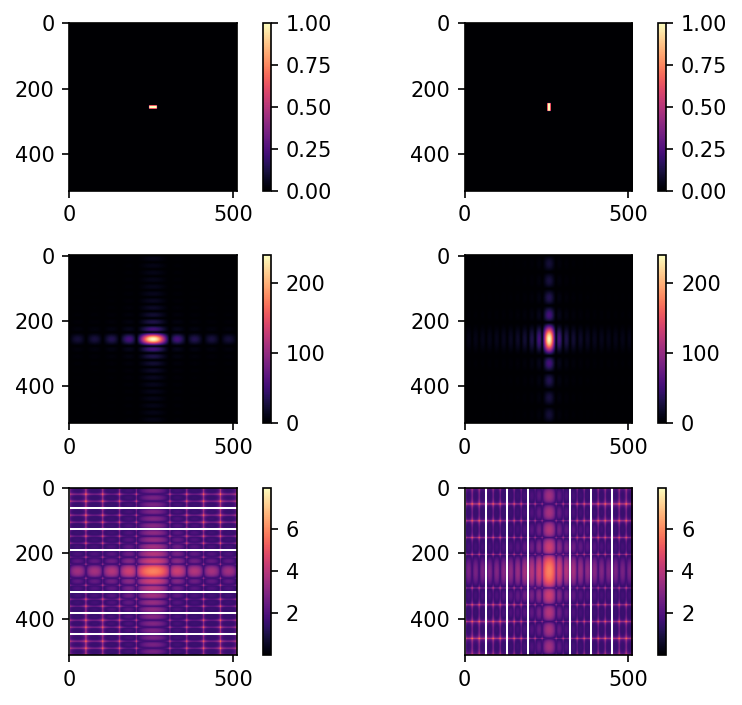

In [109]:
visualize_set(R_set) #call the function to plot images

In [110]:
C_set = np.array([C_apertures, C_ffts[:,0], C_ffts[:,1]]) #store all images in a set for visualization

The diagram below shows the circular apertures, their Fourier Transforms, and the log-scale Fourier Transforms. The first row corresponds to the apertures, the middle row corresponds to the Fourier Transforms, and the Bottom Row corresponds to the log-scale Fourier Transform. The left column corresponds to the 5 pixel radius, the middle column is the 10 pixel radius, and the right column is the 20 pixel radius.

Due to the limits of the pixel dimensions, the 5 pixel radius aperture is angular around the edges and is almost box-like. Consequently, its Fourier Transform also resembles boxes in a ring pattern. As the radius gets larger, the edges also become rounder. In return, their Fourier Transform resemble rings around a bright circle rather than a box-like. Additionally, the rings of Fourier Transform decreases in radius as the radius in the "image-space" increases.

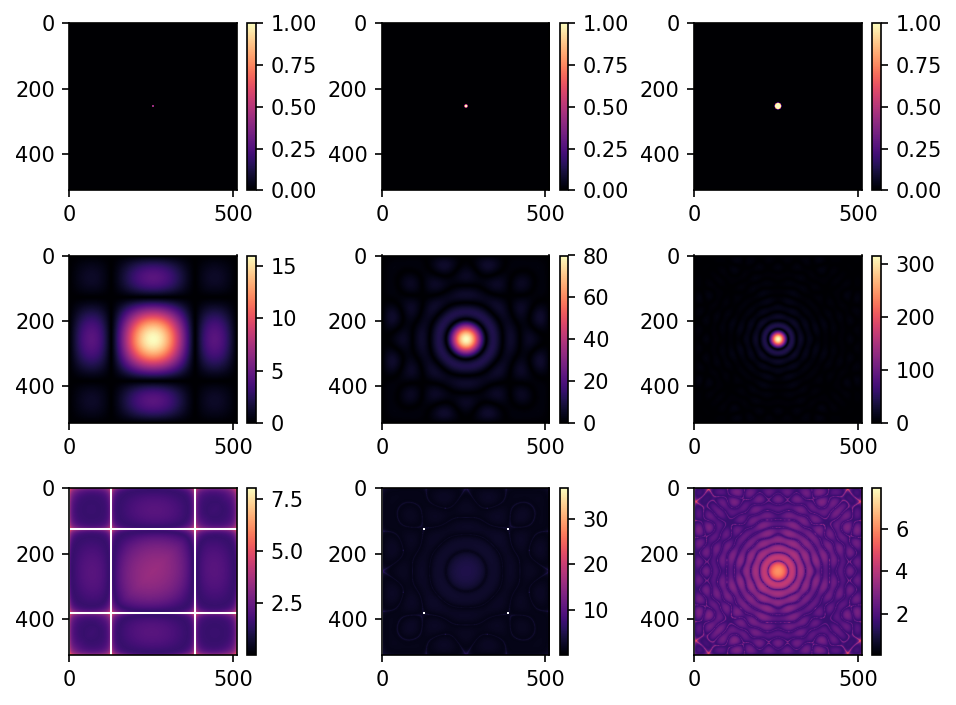

In [84]:
visualize_set(C_set) #call the function to plot images

#### PART 2 - Convolution *(20 points)*

Now that we've shown that FT acts as if an imaging system, suppose we have an image and convolve it with a circular aperture with different radii. Assuming that the circular aperture is a camera lens, we want to show how the reconstruction of the original image can be limited by the properties of the camera lens (or any imaging device) such as aperture size.

Take the astronaut image from skimage and convolve it with circular apertures of radii: 8, 32, and 64 pixels.

To do this, you can perform the ff. steps:

- **Compute Fourier Transform of Image:**
  - Use `fft2` to compute the 2D Fourier Transform of the input image.
  
- **Compute Fourier Transform of Aperture:**
  - Use `fftshift` to shift the zero-frequency component to the center.

- **Perform Element-wise Multiplication in Frequency Domain:**
  - Multiply the Fourier Transform of the image and the shifted aperture element-wise in the frequency domain.

- **Compute Inverse Fourier Transform:**
  - Use `ifft2` to compute the 2D Inverse Fourier Transform of the product from the previous step.

- **Visualization (Plotting):**
  - Create a figure with three subplots to visualize the original image, the aperture, and the convolution result.

# Image Reconstruction

## Getting the Image

The library skimage provides the astronaut image as the sample to be used. The FT of the sample image was determined using the
FFT() function.

In [85]:
from skimage import color, data, exposure, img_as_float
from skimage.transform import rescale

img_sam = img_as_float(color.rgb2gray(data.astronaut())) #convert image to grayscale for preprocessing
fft_img_sam = FFT(img_sam) #get the shifted 2D fft of image

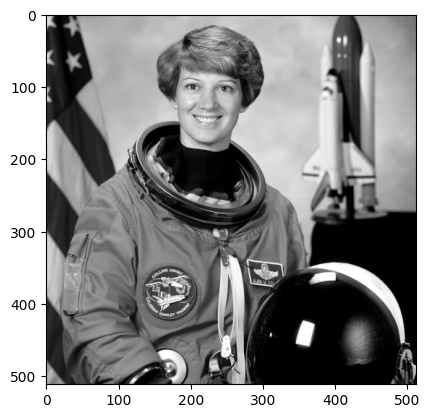

In [86]:
plt.imshow(img_sam, cmap ="gray") #display grayscale image

## FFT Image

### Constructing the apertures

The apertures are constructed using the functions defined in the previous part. Their widths are 8, 32, and 64 respectively. The size of the image is set to 512. Their ffts are determined using the FFT() function.

In [87]:
N = 2**9 #size of image 512 pixels
C_aperture8 = circular_aperture(N,8) #aperture with 8 pixel radius
C_aperture32 = circular_aperture(N,32) #aperture with 32 pixel radius
C_aperture64 = circular_aperture(N,64) #aperture with 64 pixel radius
#Fourier Transforms
fft_C_aperture8 = FFT(C_aperture8)
fft_C_aperture32 = FFT(C_aperture32)
fft_C_aperture64 = FFT(C_aperture64)

The figure below visualizes the circular apertures of increasing radius.

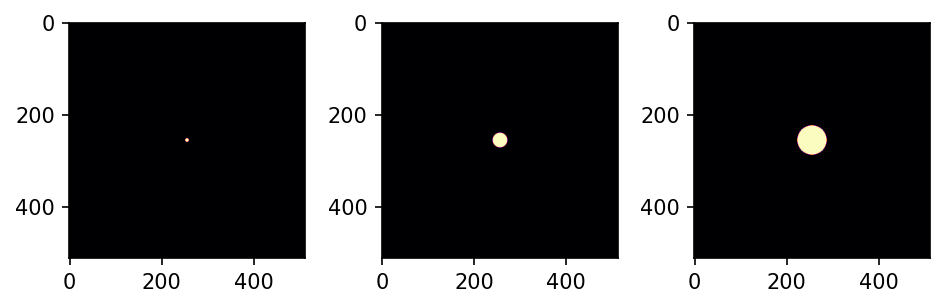

In [88]:
fig, axs = plt.subplots(1,3,layout = "tight", dpi = 150)
axs[0].imshow(abs(C_aperture8), cmap = 'magma') #display apertures
axs[1].imshow(abs(C_aperture32), cmap = 'magma')
axs[2].imshow(abs(C_aperture64), cmap = 'magma')

The code below visualizes the ffts of the apertures. Similar to what I mentioned earlier, the radius of the ffts get smaller as the radius of the aperture gets larger.

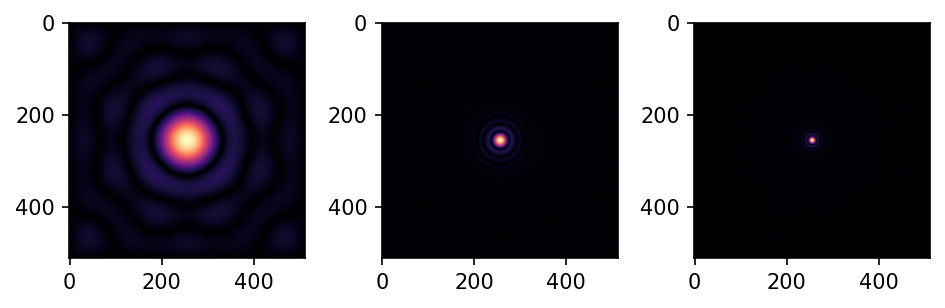

In [89]:
fig, axs = plt.subplots(1,3,layout = "tight", dpi = 150)
axs[0].imshow(abs(fft_C_aperture8), cmap = 'magma') #display Fourier Tranform of Apertures
axs[1].imshow(abs(fft_C_aperture32), cmap = 'magma')
axs[2].imshow(abs(fft_C_aperture64), cmap = 'magma')

Performing element-wise multiplication with the Fourier Transform of the image and the corresponding aperture yields the results below. Element-wise multiplication was done using np.multiply.

In [90]:
convolved1 = np.multiply(fft_img_sam,C_aperture8) #element-wise multiplication with the 8-pixel aperture
convolved2 = np.multiply(fft_img_sam,C_aperture32) #element-wise multiplication with the 32-pixel aperture
convolved3 = np.multiply(fft_img_sam,C_aperture64)#element-wise multiplication with the 64-pixel aperture

Visualizing the result, we can see that the larger the aperture the sharper the image. This method of image reconstruction is a simulation to physical imaging systems such as the camera. More light captured by the device results to a better-resolved image.

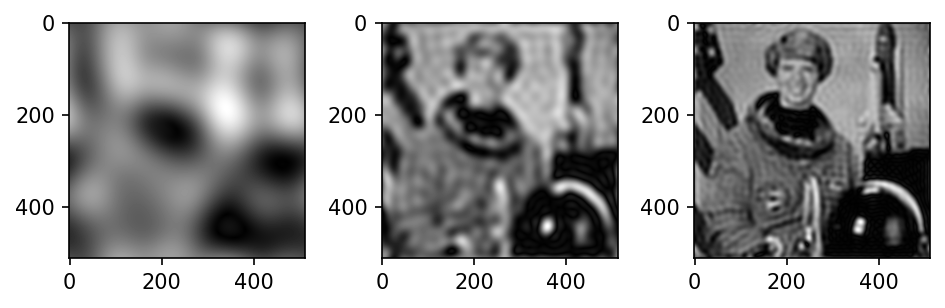

In [112]:
fig, axs = plt.subplots(1,3, layout = "tight", dpi = 150)
axs[0].imshow(abs(ifft2(convolved1)), cmap = "gray") #display results
axs[1].imshow(abs(ifft2(convolved2)), cmap = "gray")
axs[2].imshow(abs(ifft2(convolved3)), cmap = "gray")

#### PART 3 - Correlation *(20 points)*

In this task, we observe using the correlation method that the similarity between two functions can be extracted-- this is also referred to as template matching.

You can get the test and target images from the "Datasets" folder in the course GDrive:
- AP157_moduleB2_correlation_test_image.png (with text "The Rain in Spain Stays Mainly in the Plain")
- AP157_moduleB2_correlation_target_image.png (with text "A")

In the correlation result, the high intensity portions indicate the presence of letter 'A' on the test image.

To get the correlation, you can perform the ff. steps:

- **Compute Fourier Transforms:**
  - Use `fft2` to compute the 2D Fourier Transform of the input test image (`image`).
  - Use `fft2` and `np.conj` to compute the complex conjugate of the 2D Fourier Transform of the target template.

- **Compute Cross-Correlation in Frequency Domain:**
  - Multiply the Fourier Transforms of the image and the complex conjugate of the Fourier Transform of the target template element-wise in the frequency domain.

- **Compute Inverse Fourier Transform:**
  - Use `ifft2` to compute the 2D Inverse Fourier Transform of the correlation.

- **Visualization (Plotting):**
  - Create a figure with three subplots to visualize the original image, the target image, and the correlation result.
  - Add colorbars to each subplot for reference and to visualize intensity levels.

In [92]:
from google.colab import drive
drive.mount("/content/drive")
file_path = "/content/drive/My Drive/AP157/Datasets/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Correlation determines the similarity of a target object to a test object. In the following, correlation is performed on a test object (a sentence) and a target object (a letter) to determine where in the sentence can the letter be found.

The target and test images are read from the drive using cv2. In the preprocessing stage, the images are converted to grayscale.

In [93]:
target_image = cv2.imread(file_path + 'AP157_moduleB2_correlation_target_image.png') #load images
t_image = cv2.imread(file_path + 'AP157_moduleB2_correlation_test_image.png')
test_image = cv2.resize(t_image, (target_image.shape[1], target_image.shape[0])) # resize test image to equal the target image

#preprocessing convert to grayscale
gray_target = cv2.cvtColor(target_image, cv2.COLOR_BGR2GRAY)
gray_test = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)


The Fourier Transforms of the images are determined using fft2 instead of FFT() since I want to preserve the spatial information in this space. According to the Correlation Theorem, a correlation of (*f* and *g*) in the "function-space" corresponds to a multiplication of the conjugate of the Fourier Transform of *f* with the Fourier Transform of *g*. In this case *f* corresponds to the target image and *g* corresponds to the test image.

In [94]:
#Fourier Transforms
fft_target = fft2(gray_target)
fft_test = fft2(gray_test)
conj_target = np.conj(fft_target) #complex conjugation

The variable target_recognition stores the of the Fourier Transforms in the frequency-space. The image correlation is then determined by the inverse transform of target_recognition.

In [95]:
target_recognition = np.multiply(fft_test,conj_target) #element-wise multiplication (correlation)
recognized_image = fftshift(ifft2(target_recognition)) #inverse of Fourier Transform to see correlation

Comparing the target image with the test image, we see that the brightest spots of the reconstructed image indeed correlate to the locations where the target can be found in the test. The location of the bright spots corresponds to the location of the words "RAIN, SPAIN, STAYS, MAINLY, PLAIN".

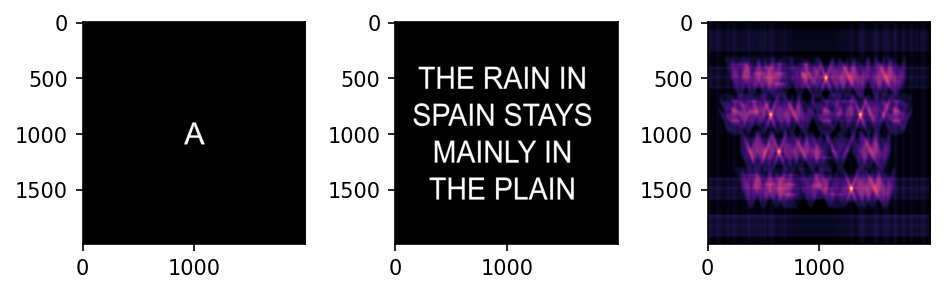

In [113]:
fig, axs = plt.subplots(1,3, layout = "tight", dpi = 150) #visualization of the correlation
axs[0].imshow(target_image) #target image (letter A)
axs[1].imshow(test_image)# test image (sentence: THE RAIN IN SPAIN STAYS MAINLY IN PLAIN)
axs[2].imshow(abs(recognized_image), cmap = 'magma') #correlated image

#### PART 4 - Application: Canvas Weave Modeling and Removal *(30 points)*

Suppose we want to investigate the brush strokes of a painter. However, the texture of the canvas obscures our view of the brushstrokes. Let’s use FFT to remove the canvas weave.

Perform the ff. steps:

1. Open the image AP157_moduleB_canvas_weave_image.jpg (also in the Datasets folder; the image is from a painting by Dr. Vincent Daria.) and convert into a grayscale image. To enhance the detection of repeating patterns we first subtract the mean grayscale from the image. This will remove the DC bias of intensity images.

2. Take the FT of the mean-subtracted image and take note of the symmetric peaks. These are the sinusoids that make up the canvas weave image, similar to the rotation property of sinusoids we did earlier.

3. Manually create a filter mask in the FT space to remove the canvas weave patterns. This is a matrix which is the same size as the image. The filter is all 1’s but are zero at the locations of the sinusoidal peaks. FFT shift this filter and multiply this to the complex FT of the Red, Green and Blue channels of the original image (not mean subtracted). The filter essentially “erases” the peaks. Take the inverse FT of the filtered FT and overlay the filtered R,G,B images. Did the canvas weave vanish enough that the paint and brushstrokes remain?

4. Invert the filter mask (0's become 1's and vice versa) and take the inverse Fourier transform. Observe the generated modulus image. Is it close to the appearance of the canvas weave?

Using cv2.imread, the image of a painting is loaded into the variable canvas. We can visually see a well-ordered pattern in the image which likely comes from the brush strokes and the paper used in the painting. The aim here is to remove the pattern to recover a smooth image.

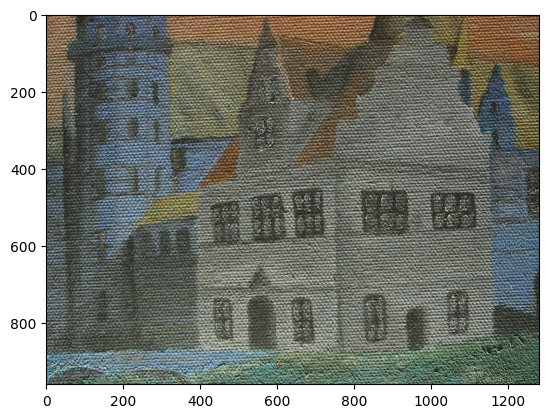

In [98]:
canvas = cv2.imread(file_path + "AP157_moduleB2_canvas_weave_image.jpg")
plt.imshow(canvas)

In the preprocessing stage, the image is converted to gray using the available cv2 functions. The mean grays scale is subtracted to remove the offset.

In [99]:
gray_canvas = cv2.cvtColor(canvas, cv2.COLOR_BGR2GRAY)
subt_gray_canvas = gray_canvas-np.mean(gray_canvas)
gray_canvas = subt_gray_canvas

The Fourier Transform of the gray scale image is determined using the function FFT.

In [100]:
fft_canvas = FFT(gray_canvas)
logfft_canvas = LogFFT(fft_canvas)

Displaying the log-scale Fourier Transform, we can observe distinct bright spots or patches. These correspond to the frequencies of the prominent patterns observed from the image. When these patterns are removed, the image reconstructed from the inverse Fourier Transform will be affected.

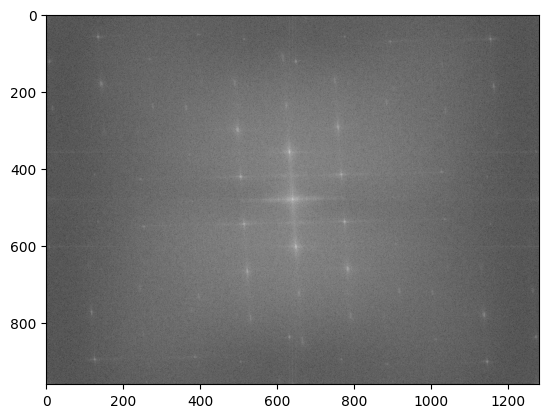

In [101]:
plt.imshow(abs(logfft_canvas),cmap = 'gray')

To extract the mask, I, along with the help of Andrea Franco, employed a simple method of using percentiles to determine the highest and lowest values of the log-scale FT. In this case, a threshold was set from which all the values are set to the maximum intensity and all the value below are set to the minimum intensity. This essentially binarizes the FT.

In [115]:
p1, p99 = np.percentile(np.abs(logfft_canvas),(1,99.5))
mask = np.where(logfft_canvas > p99,0,logfft_canvas)
mask[np.where(logfft_canvas < p99)] = 1

From the figure below, I was able to extract a black and white image to be used as a max. However, when used as a mask this image would also cover the center of the FT, which contains the information about the painting in general. Covering this would blur the image.

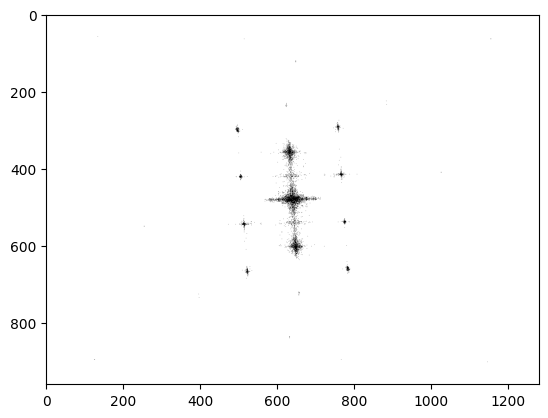

In [103]:
plt.imshow((np.abs(mask)),cmap = 'gray')

Therefore, another restriction was added to remove the center part of the max.

In [104]:
height = 120
width = 100

x = 960
y = 1280
mask[int((x - width)/2):int((x + width)/2), int((y - height)/2):int((y + height)/2)] = 1
shifted_mask = fftshift(np.abs(mask))

The final mask to be used is then shown below.

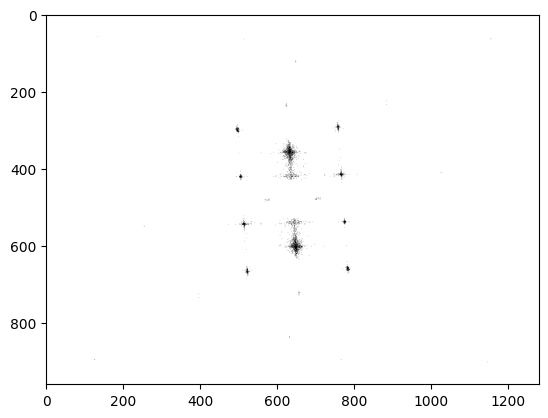

In [105]:
plt.imshow(np.abs(mask), cmap = 'gray')

The mask is applied to the FTs of each of the color channels (G,B,R in cv2). Each filtered channels are inverted and normalized

In [106]:
Gn, Bl, Rd = fft2(canvas[:, :, 0])*shifted_mask, fft2(canvas[:, :, 1])*shifted_mask, fft2(canvas[:, :, 2])*shifted_mask
invRd, invGn, invBl = np.abs(ifft2(Rd)), np.abs(ifft2(Gn)), np.abs(ifft2(Bl))

#Normalizing values
norm_inv_R = (invRd - np.min(invRd))/(np.max(invRd) - np.min(invRd))
norm_inv_G = (invGn - np.min(invGn))/(np.max(invGn) - np.min(invGn))
norm_inv_B = (invBl - np.min(invBl))/(np.max(invBl) - np.min(invBl))

The three channels are then merged in the code below. Where a blank image matrix is assigned the values of each of the color channels

In [107]:
filtered_canvas = np.zeros(canvas.shape)
filtered_canvas[:, :, 0] = norm_inv_R
filtered_canvas[:, :, 1] = norm_inv_G
filtered_canvas[:, :, 2] = norm_inv_B

Plotting the Original Image and Filtered Image shows that regular, well-ordered pattern of the paper is minimized but not fully removed. There are also other slightly more irregular patterns remaining in the image. This is because the mask was not able to fully remove those parts of the FT since they likely do not fall under the criteria used to create the mask. For a smoother reconstructed image a different mask should be used, one that includes the other bright spots and patches of the FT.

Text(0.5, 1.0, 'Filtered Image')

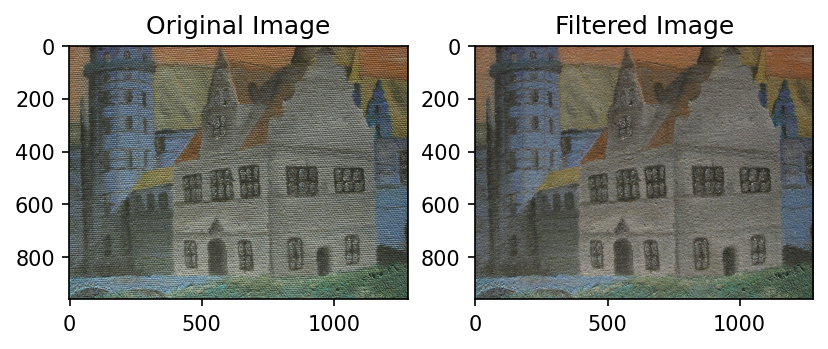

In [108]:
fig,axs = plt.subplots(1,2,dpi = 150)
axs[0].imshow(canvas)
axs[0].set_title("Original Image")
axs[1].imshow(filtered_canvas)
axs[1].set_title("Filtered Image")

# Acknowledgements
* Andrea Rose Franco - for helping me figure out the masking in Part 4.
* Johnenn Manalang and Nicholas Chai - for explaining to me the concepts of Fourier Transform and image reconstruction.